In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
total_emails = pd.read_pickle("/Users/nus/twenty-years-of-bldgsim-textmining/total_email_data.pkl")

In [319]:
word_freq = pd.read_csv("/Users/nus/twenty-years-of-bldgsim-textmining/word_frequency_tagged_10_10.csv")

In [320]:
total_emails.Body = total_emails.Body.astype("U")

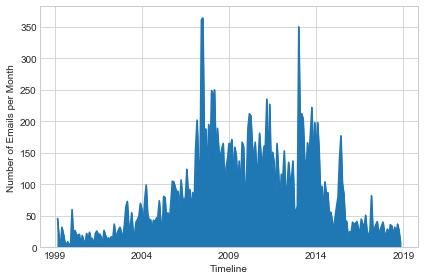

In [321]:
fig = plt.figure()
ax = total_emails.Body.resample("M").count().plot.area()
ax.set(ylabel="Number of Emails per Month", xlabel="Timeline")
plt.tight_layout()
plt.savefig("email_volume.pdf")

In [322]:
email_length = total_emails.Body.apply(lambda x: len(x))

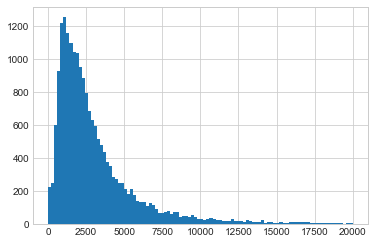

In [323]:
email_length[email_length<20000].hist(bins=100)

In [324]:
word_freq.head(20)

,Label,Word,Frequency
0,Concept,leed,24
1,Software,energyplus,20
2,System,cooling,20
3,Organization,ashrae,18
4,None,heat,18
5,Concept,weather,18
6,Software,equest,17
7,General,performance,16
8,General,software,16
9,None,air,15


In [325]:
total_emails.Body.iloc[1].count("Bradley")

1

In [326]:
def get_topic_metrics(word, body):
    word_count = 0
    word_count += body.count(word)
    word_count += body.count(str.capitalize(word))
    word_count += body.count(str.upper(word))
    return word_count

In [327]:
leed = total_emails.Body.apply(lambda x: get_topic_metrics("leed",x))

In [328]:
#leed

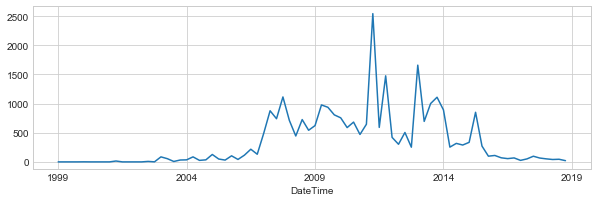

In [329]:
leed.resample("Q").sum().plot(figsize=(10,3))

In [330]:
word_freq.Label.value_counts()

None            516
General         171
FirstName        22
LastName         16
Concept          15
Company          12
Interesting      11
Software          9
System            8
Organization      8
HVAC              7
Event             7
Envelope          7
Training          6
Load              6
Equipment         5
Career            5
Name: Label, dtype: int64

In [331]:
word_freq.head(10)

,Label,Word,Frequency
0,Concept,leed,24
1,Software,energyplus,20
2,System,cooling,20
3,Organization,ashrae,18
4,None,heat,18
5,Concept,weather,18
6,Software,equest,17
7,General,performance,16
8,General,software,16
9,None,air,15


In [332]:
word_freq.index = word_freq.Word

<Figure size 432x288 with 0 Axes>

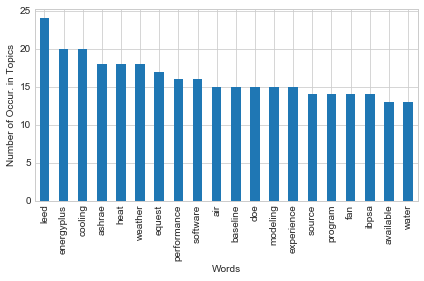

In [333]:
fig = plt.figure()
ax = word_freq.head(20).plot(kind="bar") #, hue="Label"
ax.set(ylabel="Number of Occur. in Topics", xlabel="Words")
ax.get_legend().remove()
plt.tight_layout()
plt.savefig("word_freq.pdf")

In [334]:
#categories = ["Training","HVAC","Organization","Interesting","Company","Weather","Software","LastName","Airside"]

In [335]:
categories = word_freq.Label.unique()

In [336]:
list(categories)

['Concept',
 'Software',
 'System',
 'Organization',
 'None',
 'General',
 'Career',
 'Equipment',
 'Training',
 'Event',
 'FirstName',
 'Load',
 'Company',
 'Envelope',
 'LastName',
 'HVAC',
 'Interesting']

In [337]:
categories = ['Concept',
 'Software',
 'System',
 'Organization',
 'General',
 'Career',
 'Equipment',
 'Training',
 'Event',
 'FirstName',
 'Load',
 'Company',
 'Envelope',
 'LastName',
 'HVAC',
 'Interesting']

In [338]:
list(word_freq[word_freq.Label == "Training"].head().Word)

['training', 'webinar', 'certification', 'gototraining', 'forum']

Concept


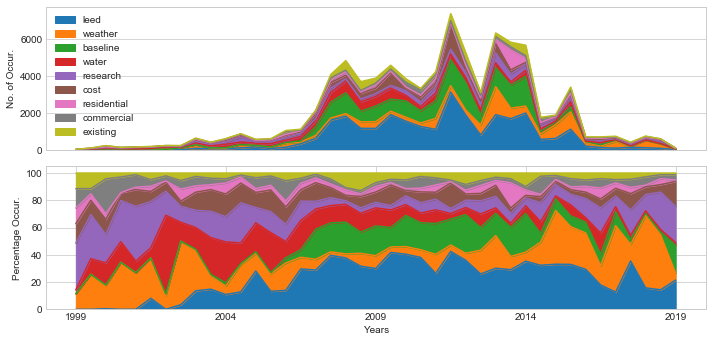

Software


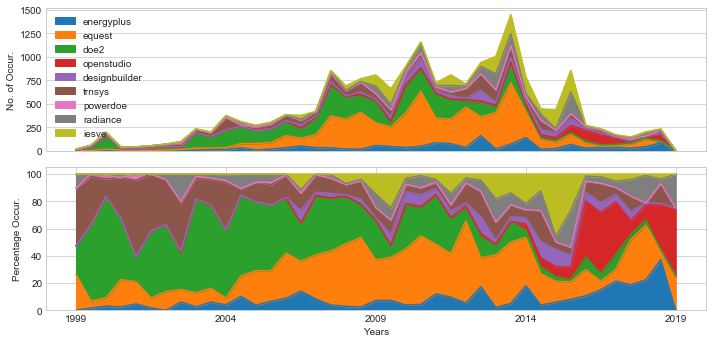

System


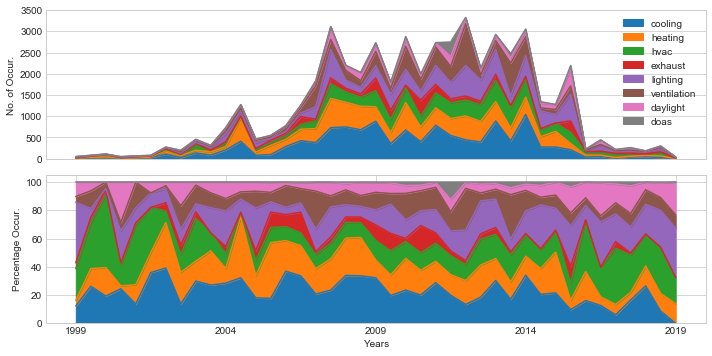

Organization


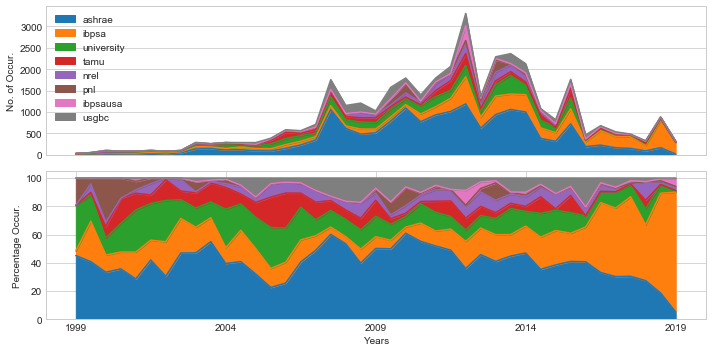

General


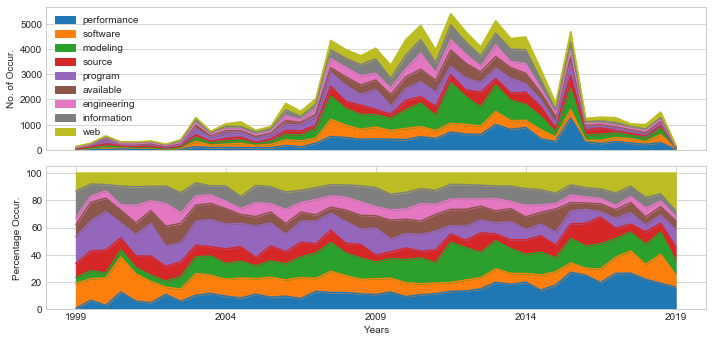

Career


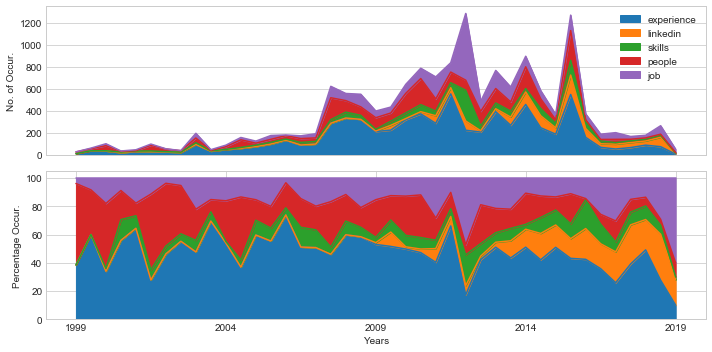

Equipment


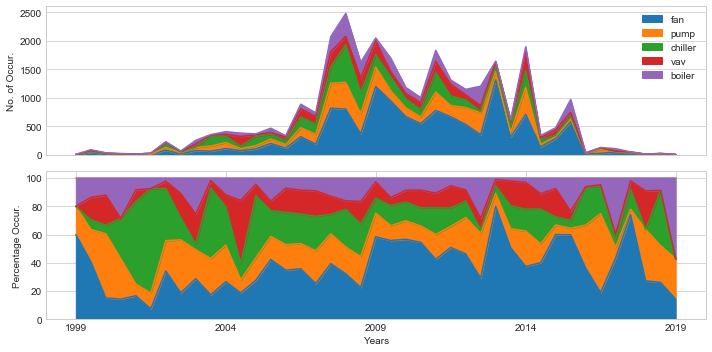

Training


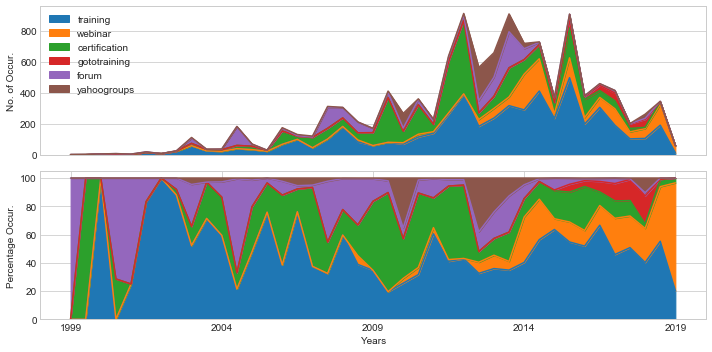

Event


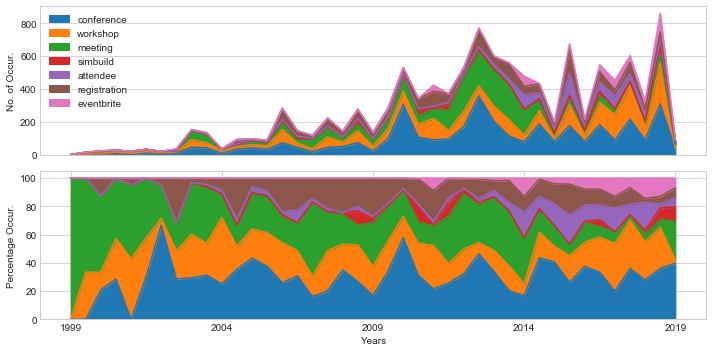

FirstName


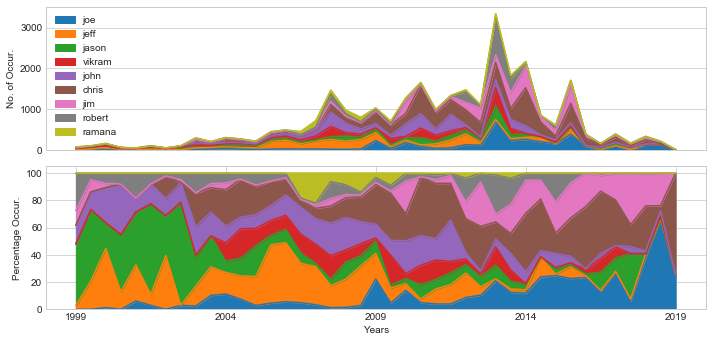

Load


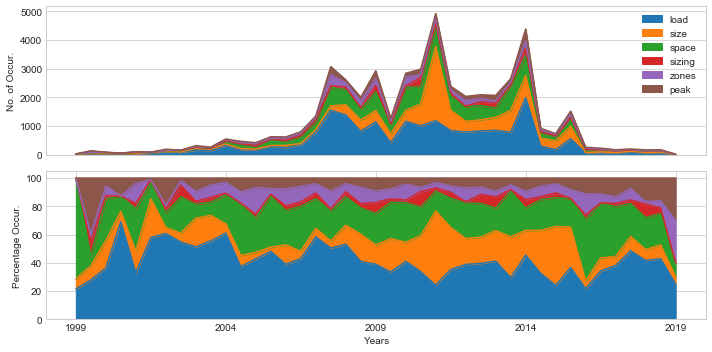

Company


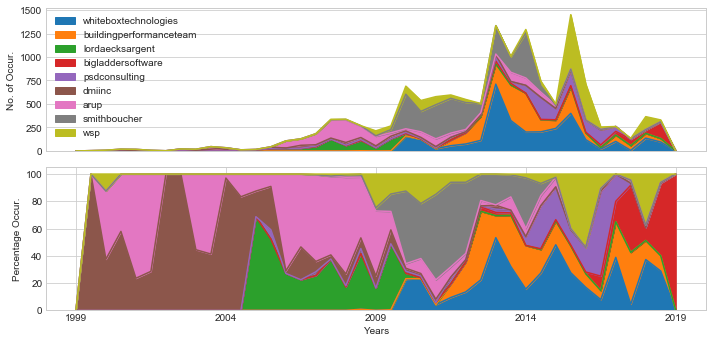

Envelope


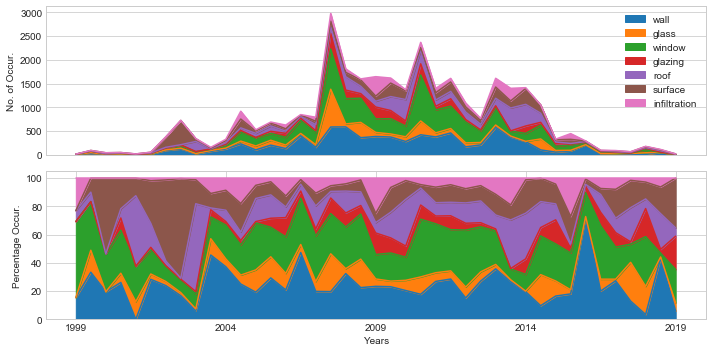

LastName


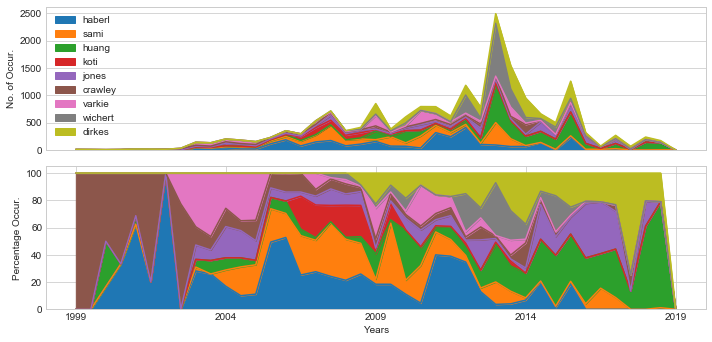

HVAC


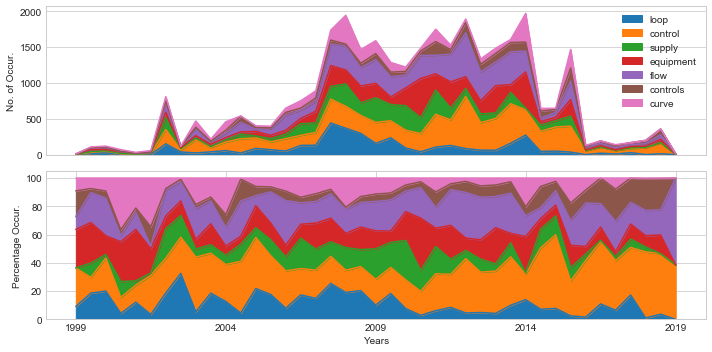

Interesting


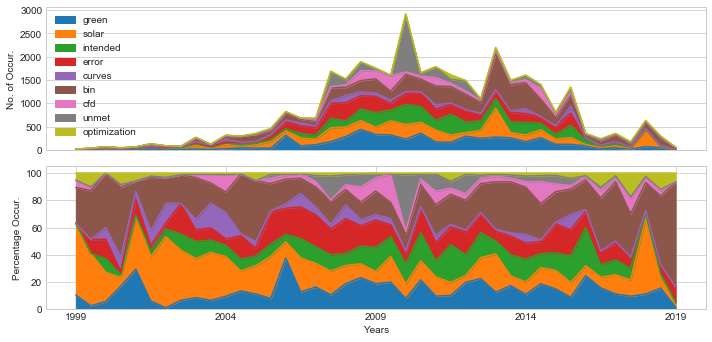

In [339]:
for category in categories:
    print(category)
    df = pd.DataFrame()
    for word in list(word_freq[word_freq.Label == category].head(9).Word):
        #print(word) 
        df[word] = total_emails.Body.apply(lambda x: get_topic_metrics(word, x))
        
    f, axes = plt.subplots(2, 1, figsize=(10,5)) #, sharex='col'
    plt.style.use('seaborn-whitegrid')
    #f.suptitle(category, fontsize=20)
    
    ax1 = df.resample("2Q").sum().plot.area(ax=axes[0])
    ax1.set(ylabel="No. of Occur.", xlabel="", xticks=[])
    #plt.show()
    df_norm = df.resample("2Q").sum().divide(df.resample("2Q").sum().sum(axis=1), axis=0)*100
    ax2 = df_norm.plot.area(ax=axes[1])
    ax2.set(ylabel="Percentage Occur.", xlabel="Years")
    ax2.get_legend().remove()
    
    plt.tight_layout()
    plt.savefig(category+".pdf")
    plt.show()
    #df.resample("A").sum().plot(figsize=(15,4),kind='bar', stacked=True)
    #plt.show()

In [369]:
total_emails.From.value_counts()

 ncaton at smithboucher.com (Nick Caton)\n                                 309
 jglazer at gard.com (Jason Glazer)\n                                      275
 jim at buildingperformanceteam.com (Jim Dirkes)\n                         205
 VSami at lasarchitect.com (Vikram Sami)\n                                 188
 yjhuang at whiteboxtechnologies.com (Joe Huang)\n                         183
 kwalkerman at gmail.com (Karen Walkerman)\n                               158
 jra_sac at yahoo.com (John Aulbach)\n                                     155
 robert at wichert.org (RobertWichert)\n                                   138
 jeffhaberl at tees.tamus.edu (Jeff Haberl)\n                              137
 jaulbach at nexant.com (Aulbach, John)\n                                  134
 DSE at grummanbutkus.com (David S Eldridge)\n                             124
 BrandonN at Hargis.biz (Brandon Nichols)\n                                122
 jhaberl at tamu.edu (Jeff Haberl)\n                

In [381]:
total_emails[total_emails.From.str.contains("balbach")]#.iloc[0].Body

,From,DateTime,Subject,Body
DateTime,,,,
2007-01-30 16:56:31,cbalbach at psdconsulting.com (Chris Balbach)\n,2007-01-30 16:56:31,passive solar simulation\n,From: cbalbach at psdconsulting.com (Chris Bal...
2007-03-10 08:44:52,cbalbach at psdconsulting.com (Chris Balbach)\n,2007-03-10 08:44:52,e Quest question\n,From: cbalbach at psdconsulting.com (Chris Bal...
2007-03-19 08:58:42,cbalbach at psdconsulting.com (Chris Balbach)\n,2007-03-19 08:58:42,Tankless Water Heaters\n,From: cbalbach at psdconsulting.com (Chris Bal...
2008-01-17 21:50:10,cbalbach at psdconsulting.com (Chris Balbach)\n,2008-01-17 21:50:10,comparing insulated core masonry block with s...,From: cbalbach at psdconsulting.com (Chris Bal...
2008-05-07 11:26:40,cbalbach at psdconsulting.com (Chris Balbach)\n,2008-05-07 11:26:40,Balance point temperature for houses\n,From: cbalbach at psdconsulting.com (Chris Bal...
2009-10-19 12:16:50,cbalbach at psdconsulting.com (Chris Balbach)\n,2009-10-19 12:16:50,Humidity Factor...?\n,From: cbalbach at psdconsulting.com (Chris Bal...
2010-02-22 23:07:50,cbalbach at psdconsulting.com (Chris Balbach)\n,2010-02-22 23:07:50,Estimating Energy Consumption Using Spreadshe...,From: cbalbach at psdconsulting.com (Chris Bal...
2010-03-08 15:41:55,cbalbach at psdconsulting.com (Chris Balbach)\n,2010-03-08 15:41:55,Proposed Energy Modeling Conference - Your\n,From: cbalbach at psdconsulting.com (Chris Bal...
2010-06-07 11:01:01,cbalbach at psdconsulting.com (Chris Balbach)\n,2010-06-07 11:01:01,effective R-value cavity insulation\n,From: cbalbach at psdconsulting.com (Chris Bal...


In [344]:
superuses = total_emails.From.value_counts().head(20)

In [358]:
names = []
for name in superuses.index.str.split("[\\(\\)]"):
    names.append(name[1])

In [359]:
names

['Nick Caton',
 'Jason Glazer',
 'Jim Dirkes',
 'Vikram Sami',
 'Joe Huang',
 'Karen Walkerman',
 'John Aulbach',
 'RobertWichert',
 'Jeff Haberl',
 'Aulbach, John',
 'David S Eldridge',
 'Brandon Nichols',
 'Jeff Haberl',
 'Chris Yates',
 'Chris Jones',
 'leen peeters',
 'Ramana Koti',
 'Carol Gardner',
 'Drury.Crawley at EE.DOE.GOV',
 'Chris Jones']

In [360]:
superuses.index = names

In [361]:
superuses

Nick Caton                     309
Jason Glazer                   275
Jim Dirkes                     205
Vikram Sami                    188
Joe Huang                      183
Karen Walkerman                158
John Aulbach                   155
RobertWichert                  138
Jeff Haberl                    137
Aulbach, John                  134
David S Eldridge               124
Brandon Nichols                122
Jeff Haberl                    114
Chris Yates                    106
Chris Jones                     99
leen peeters                    99
Ramana Koti                     97
Carol Gardner                   90
Drury.Crawley at EE.DOE.GOV     89
Chris Jones                     85
Name: From, dtype: int64